In [3]:
%pylab inline
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


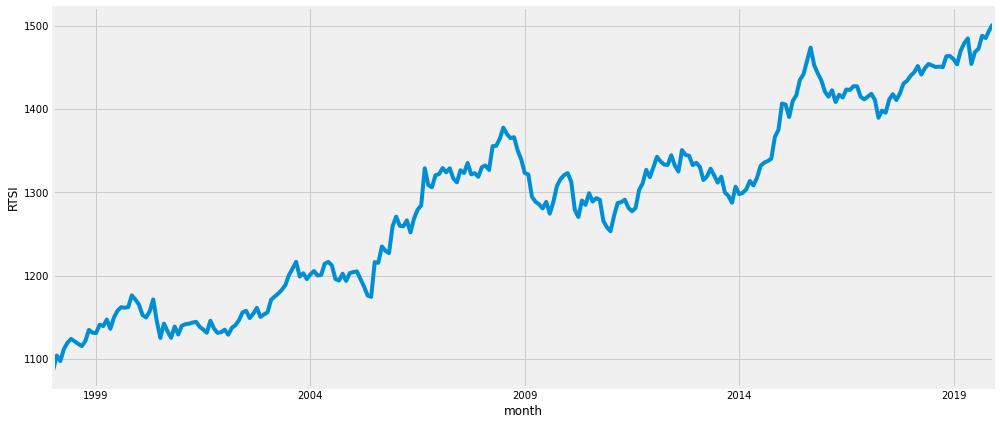

In [22]:
import sys
import warnings

warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tqdm import tqdm

%matplotlib inline

df = pd.read_csv('C:/Users/user/Desktop/Practice-2020-master/VASYA2.csv',index_col=0, parse_dates=True)
plt.figure(figsize(15,7))
df.id.plot()
plt.ylabel('RTSI')
pylab.show()

In [23]:
from sklearn.model_selection import TimeSeriesSplit
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(df)
#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(df):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))
    
             

No of observations under train1=66
No of observations under test1=66
No of observations under train2=132
No of observations under test2=66
No of observations under train3=198
No of observations under test3=66


In [24]:
#Splitting according to the above description


In [25]:
train1, test1 = df.iloc[:66, 0], df.iloc[66:132, 0]
train2, test2 = df.iloc[:132, 0], df.iloc[132:198, 0]
train3, test3 = df.iloc[:198, 0], df.iloc[198:264, 0]

In [26]:
#Fit a model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

#First fold RMSE
model1 = ExponentialSmoothing(train1, seasonal='mul', seasonal_periods=12).fit()
pred1 = model1.predict(start=test1.index[0], end=test1.index[-1])
RMSE1=round(sqrt(mean_squared_error(test1, pred1)),2)

#Second fold RMSE
model2 = ExponentialSmoothing(train2, seasonal='mul', seasonal_periods=12).fit()
pred2 = model2.predict(start=test2.index[0], end=test2.index[-1])
RMSE2=round(sqrt(mean_squared_error(test2, pred2)),2)

#Third fold RMSE
model3 = ExponentialSmoothing(train3, seasonal='mul', seasonal_periods=12).fit()
pred3 = model3.predict(start=test3.index[0], end=test3.index[-1])
RMSE3=round(sqrt(mean_squared_error(test3, pred3)),2)

print ("RMSE1:", RMSE1)
print ("RMSE2:", RMSE2)
print ("RMSE3:", RMSE3)

Overall_RMSE=round((RMSE1+RMSE2+RMSE3)/3,2)
print ("Overall RMSE:", Overall_RMSE) 

RMSE1: 106.26
RMSE2: 42.8
RMSE3: 116.13
Overall RMSE: 88.4


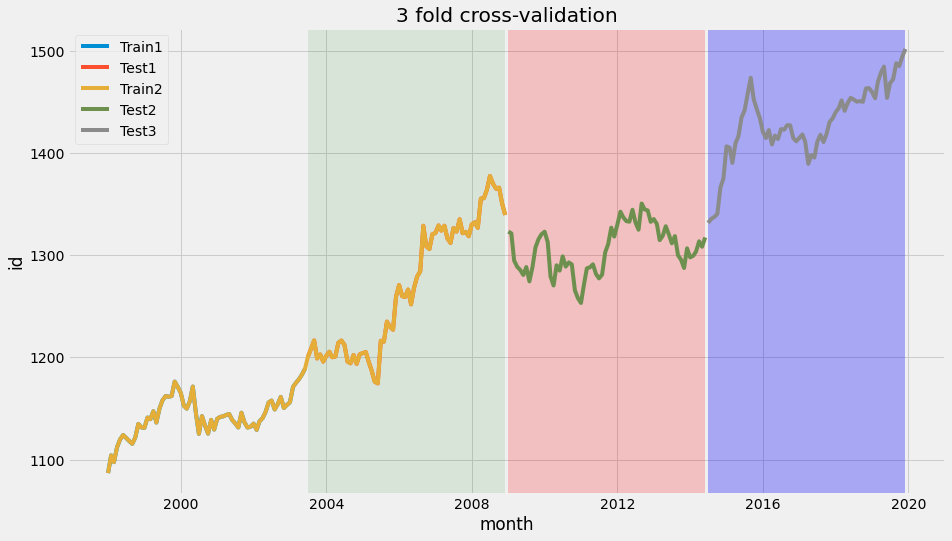

In [28]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 14,8

#Labels and titles
plt.xlabel("month")
plt.ylabel("id")
plt.title("3 fold cross-validation")

#First fold- CV
plt.plot(train1.index, train1, label='Train1')
plt.plot(test1.index, test1, label='Test1')
#plt.plot(pred1.index, pred1, label='prediction1')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test1.index[0], test1.index[-1],  facecolor='g', alpha=0.1)

#Second fold
plt.plot(train2.index, train2, label='Train2')
plt.plot(test2.index, test2, label='Test2')
#plt.plot(pred2.index, pred2, label='prediction2')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test2.index[0], test2.index[-1],  facecolor='r', alpha=0.2)

#Third fold
plt.plot(test3.index, test3, label='Test3')
#plt.plot(pred3.index, pred3, label='prediction3')
plt.legend(loc='best')
#Highlighting the region
plt.axvspan(test3.index[0], test3.index[-1],  facecolor='b', alpha=0.3)